# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics  
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')


# Getting Data

In [2]:
avocado=pd.read_csv('avocado.csv')

In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Preprocessing

Unnamed column here is not necessary it's better to drop this column

In [4]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
avocado=avocado.iloc[:,1:]

In [6]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


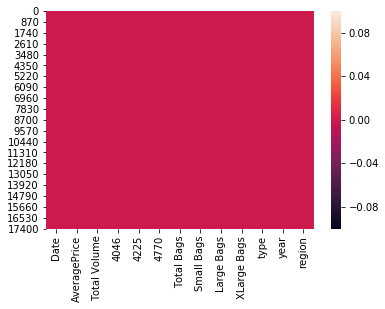

In [7]:
#Checking for null data
sns.heatmap(avocado.isnull())

it's clear that there is no null data present in this dataset

In [8]:
avocado.columns=['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Type', 'Year',
       'Region']

In [9]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
Type            18249 non-null object
Year            18249 non-null int64
Region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [10]:
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
avocado['Day']=avocado['Date'].apply(lambda x:x.day)

In [11]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Type', 'Year',
       'Region', 'Month', 'Day'],
      dtype='object')

Region and Date both are in Object format and Year is integer other than all these every attribute is in float

# Exploratory Data Analysis

### In which year Avocados has highly demand?

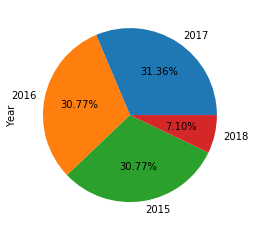

In [12]:
avocado['Year'].value_counts().plot.pie(autopct="%2.2f%%")

Mostly in 2017demand for avocados is very high compare to all other years.And in 2018 demand for avocados is too low compare to all other years.


### Which type of avocados highly demand in Nature?

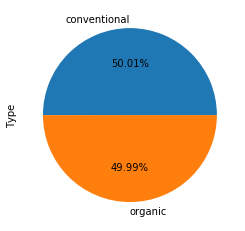

In [13]:
avocado['Type'].value_counts().plot.pie(autopct="%2.2f%%")

Conventional and Organic Avocados types are same and only little bit difference Conventional avocados has more demand compare to Organic avocados.

### For which type of Avocados has more in demand while in terms of Large bags and Small bags?

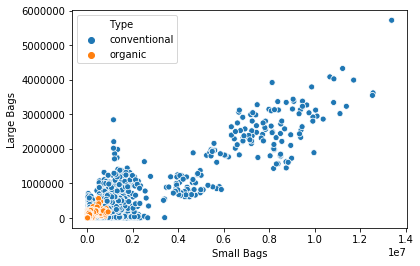

In [14]:
sns.scatterplot(x='Small Bags',y='Large Bags',hue='Type',data =avocado)

Small_Bags and Large_Bags are highly cor-related and if small bags increases Large bags going to increase.And Organic type avocados demand is too low comapare to Conventional in terms of Large Bags and Small Bags.

### How Average price is distributed over the months for Conventional and Organic Types?

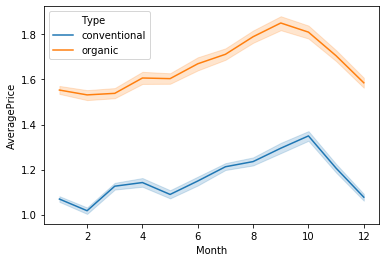

In [15]:
sns.lineplot(x="Month", y="AveragePrice", hue='Type', data=avocado)

From here it's clear that for Organic avocados average price is too good and average price for organic type is in the month of 8-12 in these months price is distributed very highly.And for conventional avocados average price is too low compare to organic and price is distributed in 10-12 months in between thse two months.

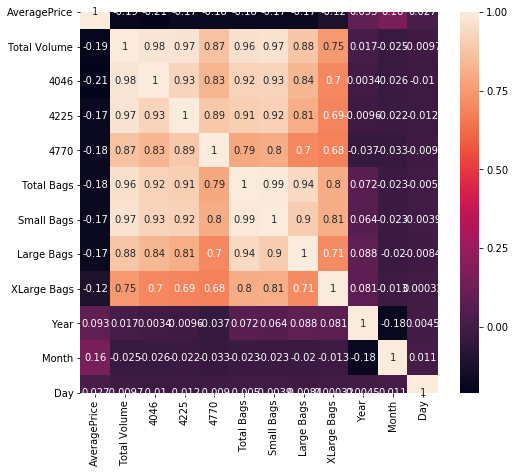

In [16]:
#to check Cor-relation
corr_hmap=avocado.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

Average_price is highly Negatively cor-relate with all other attributes.

Average_price with Type attribute is Highly Positively cor-relate each other.

It's better to drop Average_price

# Feature Engineering For Model Building

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.



In [17]:
avocado.drop('Date',axis=1,inplace=True)

In [18]:
#cleaning data from string to integer format
le=LabelEncoder()
list1=['Type','Region']
for val in list1:
    avocado[val]=le.fit_transform(avocado[val].astype(str))

In [19]:
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


Now data is looking good .

# Identify and Removing Outliers

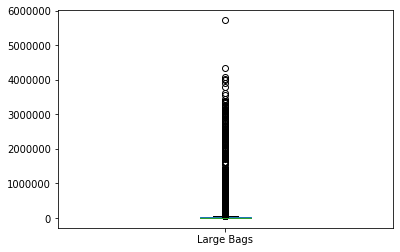

In [20]:
avocado['Large Bags'].plot.box()

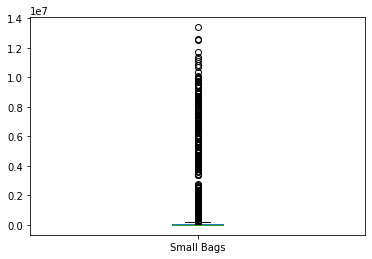

In [21]:
avocado['Small Bags'].plot.box()

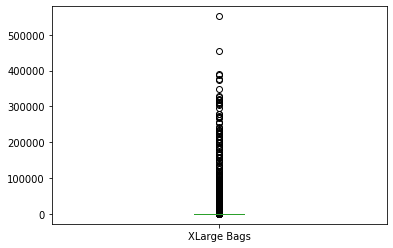

In [22]:
avocado['XLarge Bags'].plot.box()

AveragePrice       AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Total Volume    AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
4046            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
4225            AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
4770            AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Total Bags      AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Small Bags      AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Large Bags      AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
XLarge Bags           AxesSubplot(0.125,0.125;0.0824468x0.343182)
Type               AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Year               AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Region             AxesSubplot(0.421809,0.125;0.0824468x0.343182)
Month              AxesSubplot(0.520745,0.125;0.0824468x0.343182)
Day                AxesSubplot(0.619681,0.125;0.0824468x0.343182)
dtype: object

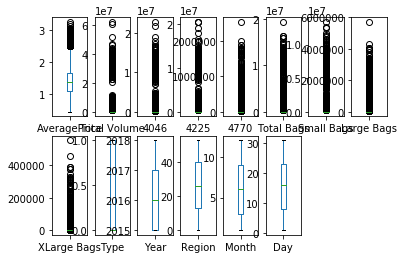

In [23]:
avocado.plot(kind='box',subplots=True,layout=(2,8))

You can see all above cases there alot of outliers present in this data set and the next step is to removing outliers.

In [24]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(avocado))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [25]:
threshold=3
np.where((z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [26]:
z[346][1]

2.234544829955079

In [27]:
z[359][6]

0.5012483657070911

In [28]:
avocado_new=avocado[(z<3).all(axis=1)]#removing outliers

In [29]:
avocado_new.shape

(17651, 14)

In [30]:
avocado.shape

(18249, 14)

467 rows had been removed as an outliers

In [31]:
x=avocado_new.drop('AveragePrice',axis=1)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [32]:
y=avocado_new['AveragePrice']

In [33]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Checking Distribution Of Skewness

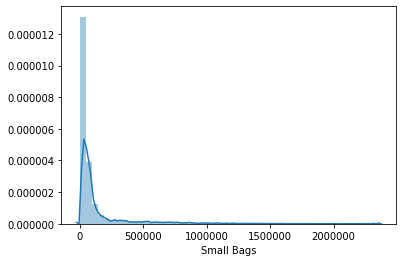

In [34]:
sns.distplot(avocado_new['Small Bags'])

In [35]:
collist=x.columns
ncol=12
nrows=10

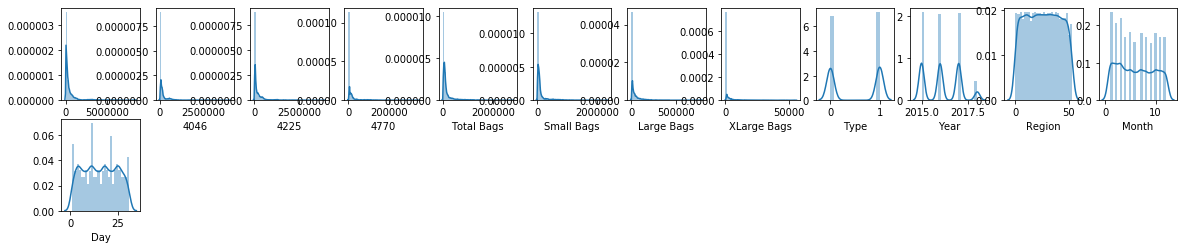

In [36]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

In [37]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

skewness of each and every attribute is morethan .55 so have to remove those skewness by applying techniques

In [38]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [39]:
x.skew()

Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

Still Xlerge Bags has skewness it's better to remove this column.

In [40]:
x.drop('XLarge Bags',axis=1,inplace=True)

In [41]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,Type,Year,Region,Month,Day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0,2015,0,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0,2015,0,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0,2015,0,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0,2015,0,12,6
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0,2015,0,11,29


In [42]:
x.skew()

Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

Now data is looking good .

# Building a MachineLearning Model

In [43]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,Type,Year,Region,Month,Day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0,2015,0,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0,2015,0,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0,2015,0,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0,2015,0,12,6
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0,2015,0,11,29


In [44]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [46]:
x_train.shape

(14120, 12)

In [47]:
x_test.shape

(3531, 12)

In [48]:
y_train.shape

(14120,)

In [49]:
y_test.shape

(3531,)

In [50]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [51]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


score 0.5501492535611359


Performance Measures:
MAE 0.20397516061474708
MSE 0.06629867736780033
RMSE 0.25748529543995385
*********************** DecisionTreeRegressor ************


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


score 1.0


Performance Measures:
MAE 0.12464174454828658
MSE 0.03488232795242141
RMSE 0.18676811278272695
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                 

In [52]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},columns=['models','score','MAE','MSE','RMSE'])
result

,models,score,MAE,MSE,RMSE
0,LinearRegression,55.014925,0.203975,0.066299,0.257485
1,DecisionTreeRegressor,100.000000,0.124642,0.034882,0.186768
2,RandomForestRegressor,97.469157,0.097592,0.018956,0.137680


Well as we can see the RMSE for RandomForestModel is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

In [53]:
pred_rfr=rfr.predict(x_test)
print("predicted wins",pred_rfr)
print("actual wins",y_test)

predicted wins [1.337 1.403 1.097 ... 1.356 1.58  1.351]
actual wins 8959     1.14
9794     1.40
3452     1.14
4203     0.88
13673    1.82
         ... 
8470     0.80
2825     1.18
5032     1.40
11250    1.51
16221    1.31
Name: AveragePrice, Length: 3531, dtype: float64


# Saving Model

In [54]:
avocado_new=pd.DataFrame(pred_rfr)
avocado_new.to_csv('rNDOMFORESTRERESSOR_avocado.csv')

In [55]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'avocado.obj')
#load the model from a file
dct_from_joblib=joblib.load('avocado.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([1.337, 1.403, 1.097, ..., 1.356, 1.58 , 1.351])

Finally model had been saved.